In [1]:
from sheap.spectra_readers import parallel_reader 
from sheap.MainSheap import Sheapectral 
from sheap.RegionHandler.RegionBuilder import RegionBuilder
from sheap.RegionHandler.RegionFitting import RegionFitting
from sheap.ploting import *

#### We have to add the posibility of have 4 parameters _ at least for the emission, narrow and bals? 

In [2]:
import jax 
from jax import jit 
import jax.numpy as jnp
import numpy as np 
import glob 
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import pickle 
jax.config.update("jax_enable_x64", True)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
pickles = glob.glob("/home/felipe/work/spectra_lens_paper/WGD2038/pickles/*")
dict_ = {}
for i in pickles:
    with open(i, "rb") as file:
        flux_dict = pickle.load(file)
        dict_.update(flux_dict)

In [5]:
nir_band = np.array([list(dict_[key].values()) for key in dict_.keys() if "vis" in key and "G" not in key])

In [6]:
nir_band[:,0,:] /= (1+0.77)
#5600,7300
#4400, 5600
masK= (nir_band[0,0,:]>4400) & (nir_band[0,0,:]<5600 )
indics = np.where(masK)[0]
nir_band = nir_band[:, :, indics]

In [7]:
test_clase = Sheapectral(nir_band,z=0)
z_s=test_clase.z
norm_factor=10**test_clase.spectra_exp
Spectra = test_clase.spectra

Warning SHEAP works with arrays (n,3,X); if your array is (n,2,X) it will add an array equal to 1% of signal
Warning no coords define the code will not correct for extinction
Assuming same redsfhit for all the objects 


In [8]:
region = RegionBuilder(4400,5600)

In [9]:
region

In [10]:
region.to_complex(add_free=True,free_Fe=False)

AttributeError: 'RegionBuilder' object has no attribute 'regions_to_fit'

In [54]:
region = RegionBuilder(4400,5600)
#
region.make_region(verbose=True,Fe_regions=[],force_linear=False,n_broad = 2,n_narrow=2 ,narrow_plus=False,add_out_flow=True) #,weighted=True
#region.make_region(verbose=True,Fe_regions=['FeII_coronal', 'FeII_IZw1', 'Fe_uv', 'feII_forbidden'],force_linear=False,n_broad = 2,n_narrow=2 ,narrow_plus=False,add_out_flow=True) 

In [45]:
'FeII_coronal', 'FeII_IZw1', 'Fe_uv', 'feII_forbidden'

('FeII_coronal', 'FeII_IZw1', 'Fe_uv', 'feII_forbidden')

In [55]:
clase = RegionFitting(region.to_complex(add_free=True,free_Fe=False))

We assume a local linear continuum


In [47]:
clase.dict_region

{'region': [{'center': 4685.71,
   'line_name': 'HeIId',
   'component': 1,
   'kind': 'narrow',
   'profile': 'guassian',
   'amplitude': 1.0},
  {'center': 4685.71,
   'line_name': 'HeIId',
   'component': 2,
   'amplitude': 0.5,
   'kind': 'narrow',
   'profile': 'guassian'},
  {'center': 4685.71,
   'line_name': 'HeIId',
   'component': 1,
   'kind': 'broad',
   'profile': 'guassian',
   'amplitude': 1.0},
  {'center': 4685.71,
   'line_name': 'HeIId',
   'component': 2,
   'amplitude': 0.5,
   'kind': 'broad',
   'profile': 'guassian'},
  {'center': 4471.479,
   'line_name': 'HeId',
   'component': 1,
   'kind': 'narrow',
   'profile': 'guassian',
   'amplitude': 1.0},
  {'center': 4471.479,
   'line_name': 'HeId',
   'component': 2,
   'amplitude': 0.5,
   'kind': 'narrow',
   'profile': 'guassian'},
  {'center': 4471.479,
   'line_name': 'HeId',
   'component': 1,
   'kind': 'broad',
   'profile': 'guassian',
   'amplitude': 1.0},
  {'center': 4471.479,
   'line_name': 'HeId',
 

In [56]:
clase(Spectra,num_steps=1000,weighted=False)

Runing: tied_params_step_1
learning_rate: 0.1
optimizer: adabelief
num_steps: 1000
Runing: tied_params_step_2
We assume a local linear continuum
learning_rate: 0.01
optimizer: adabelief
num_steps: 2000


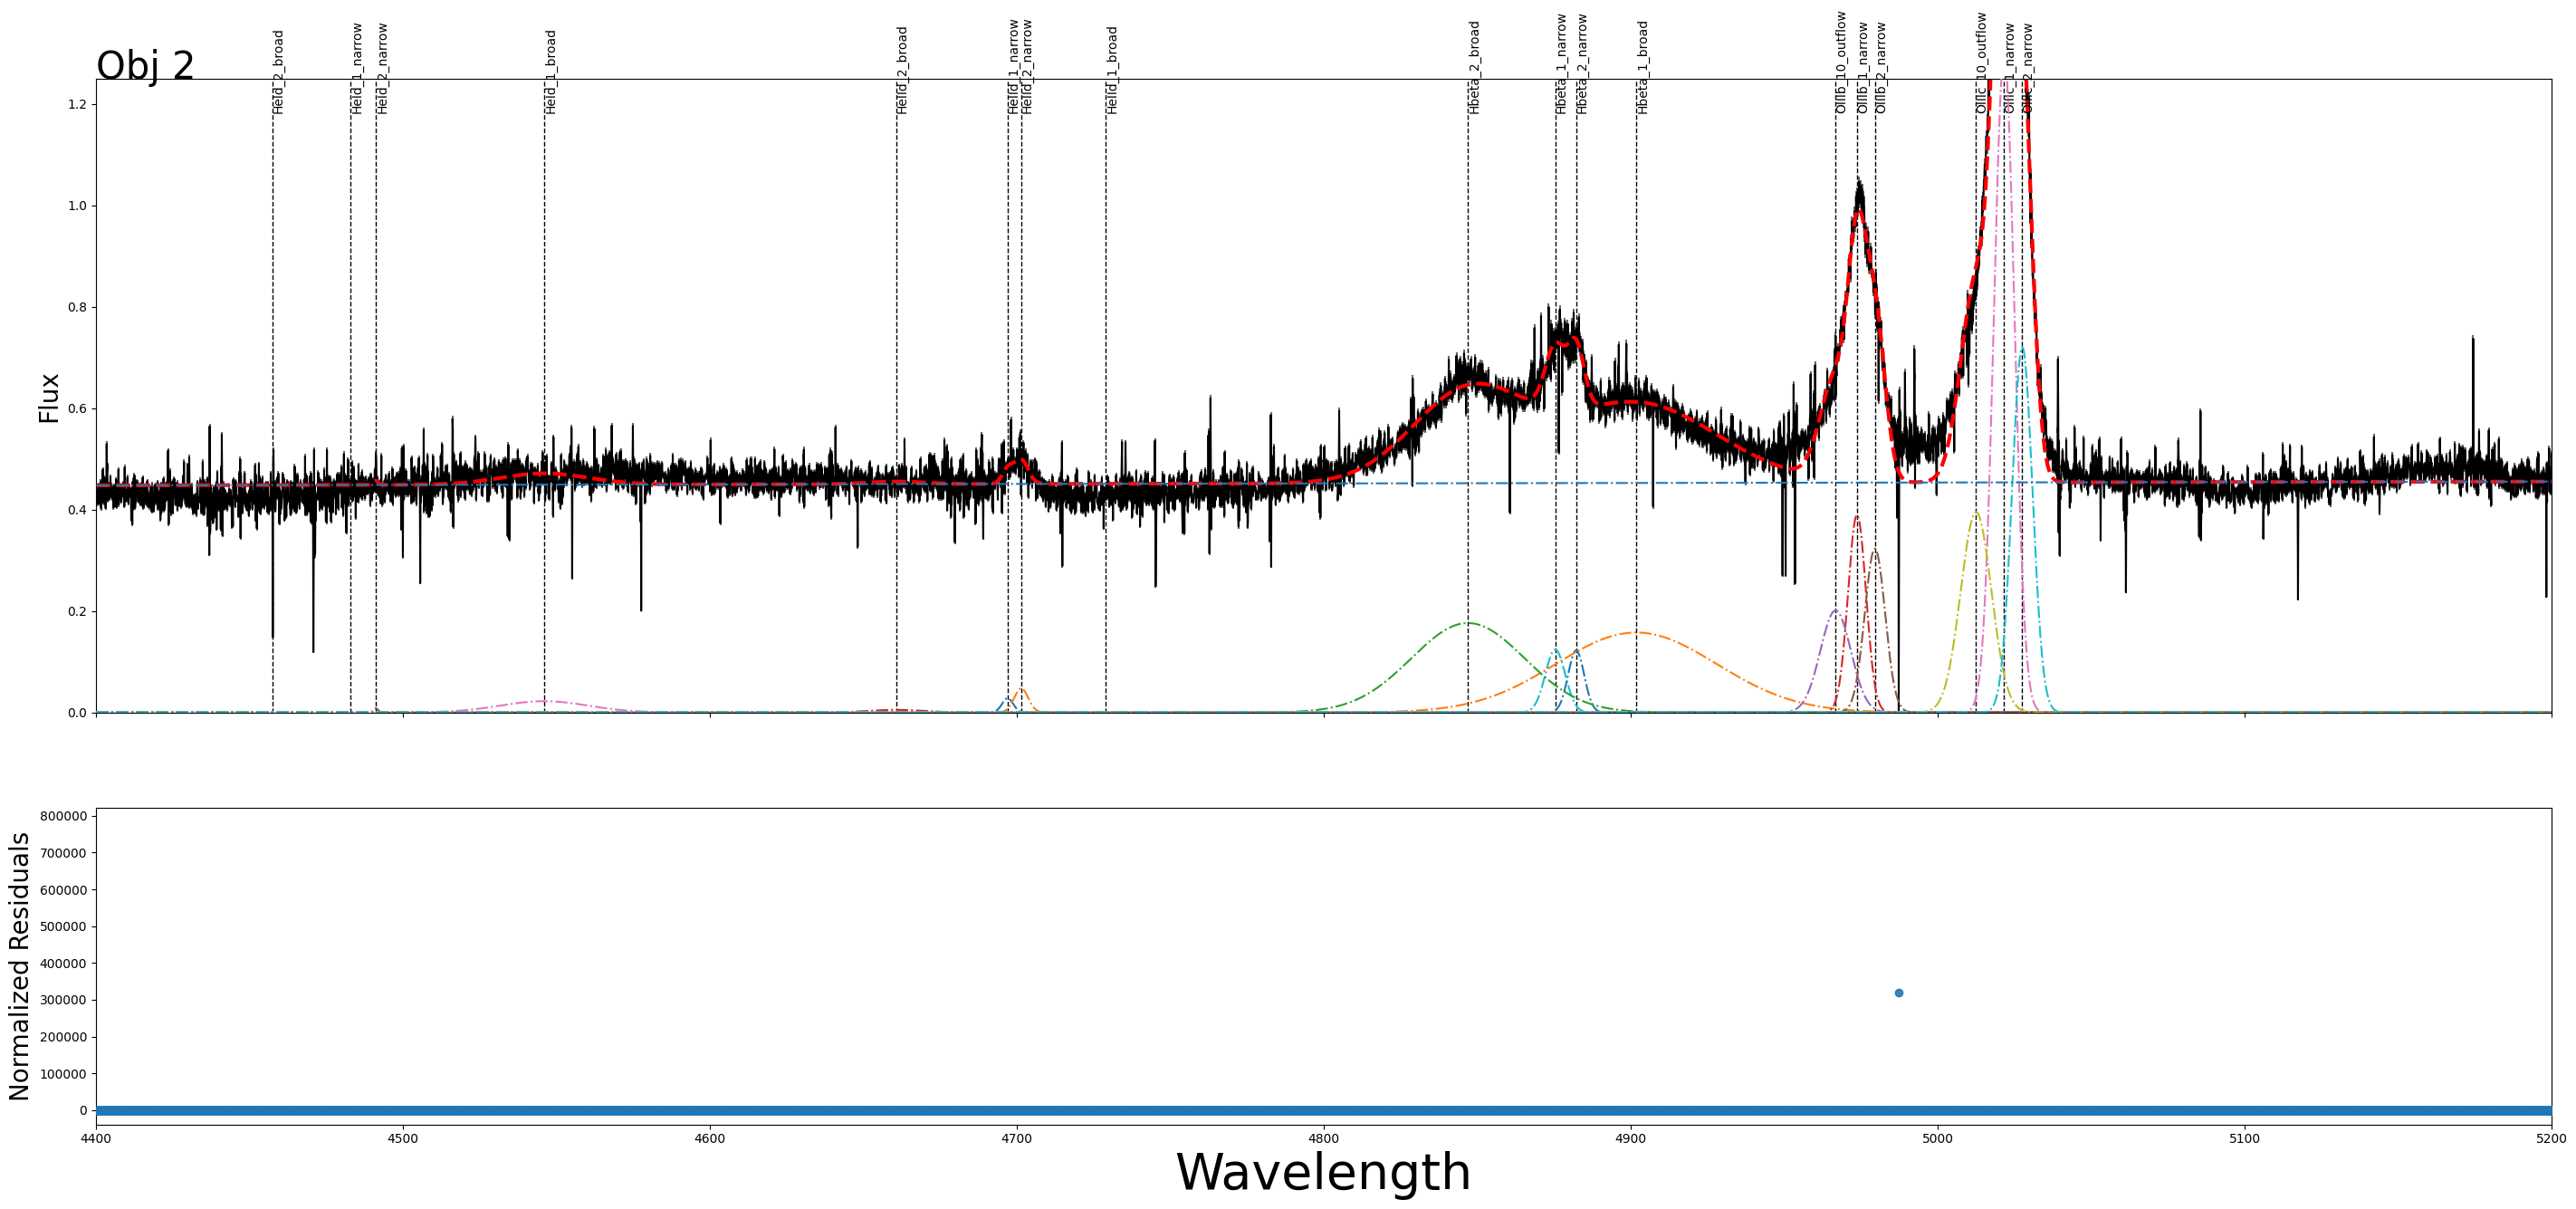

In [60]:
region_plot = SheapRegionplot(clase)
region_plot.plot(2,xlim=[4400,5200],ylim=[0,1.25],add_name=True)#207

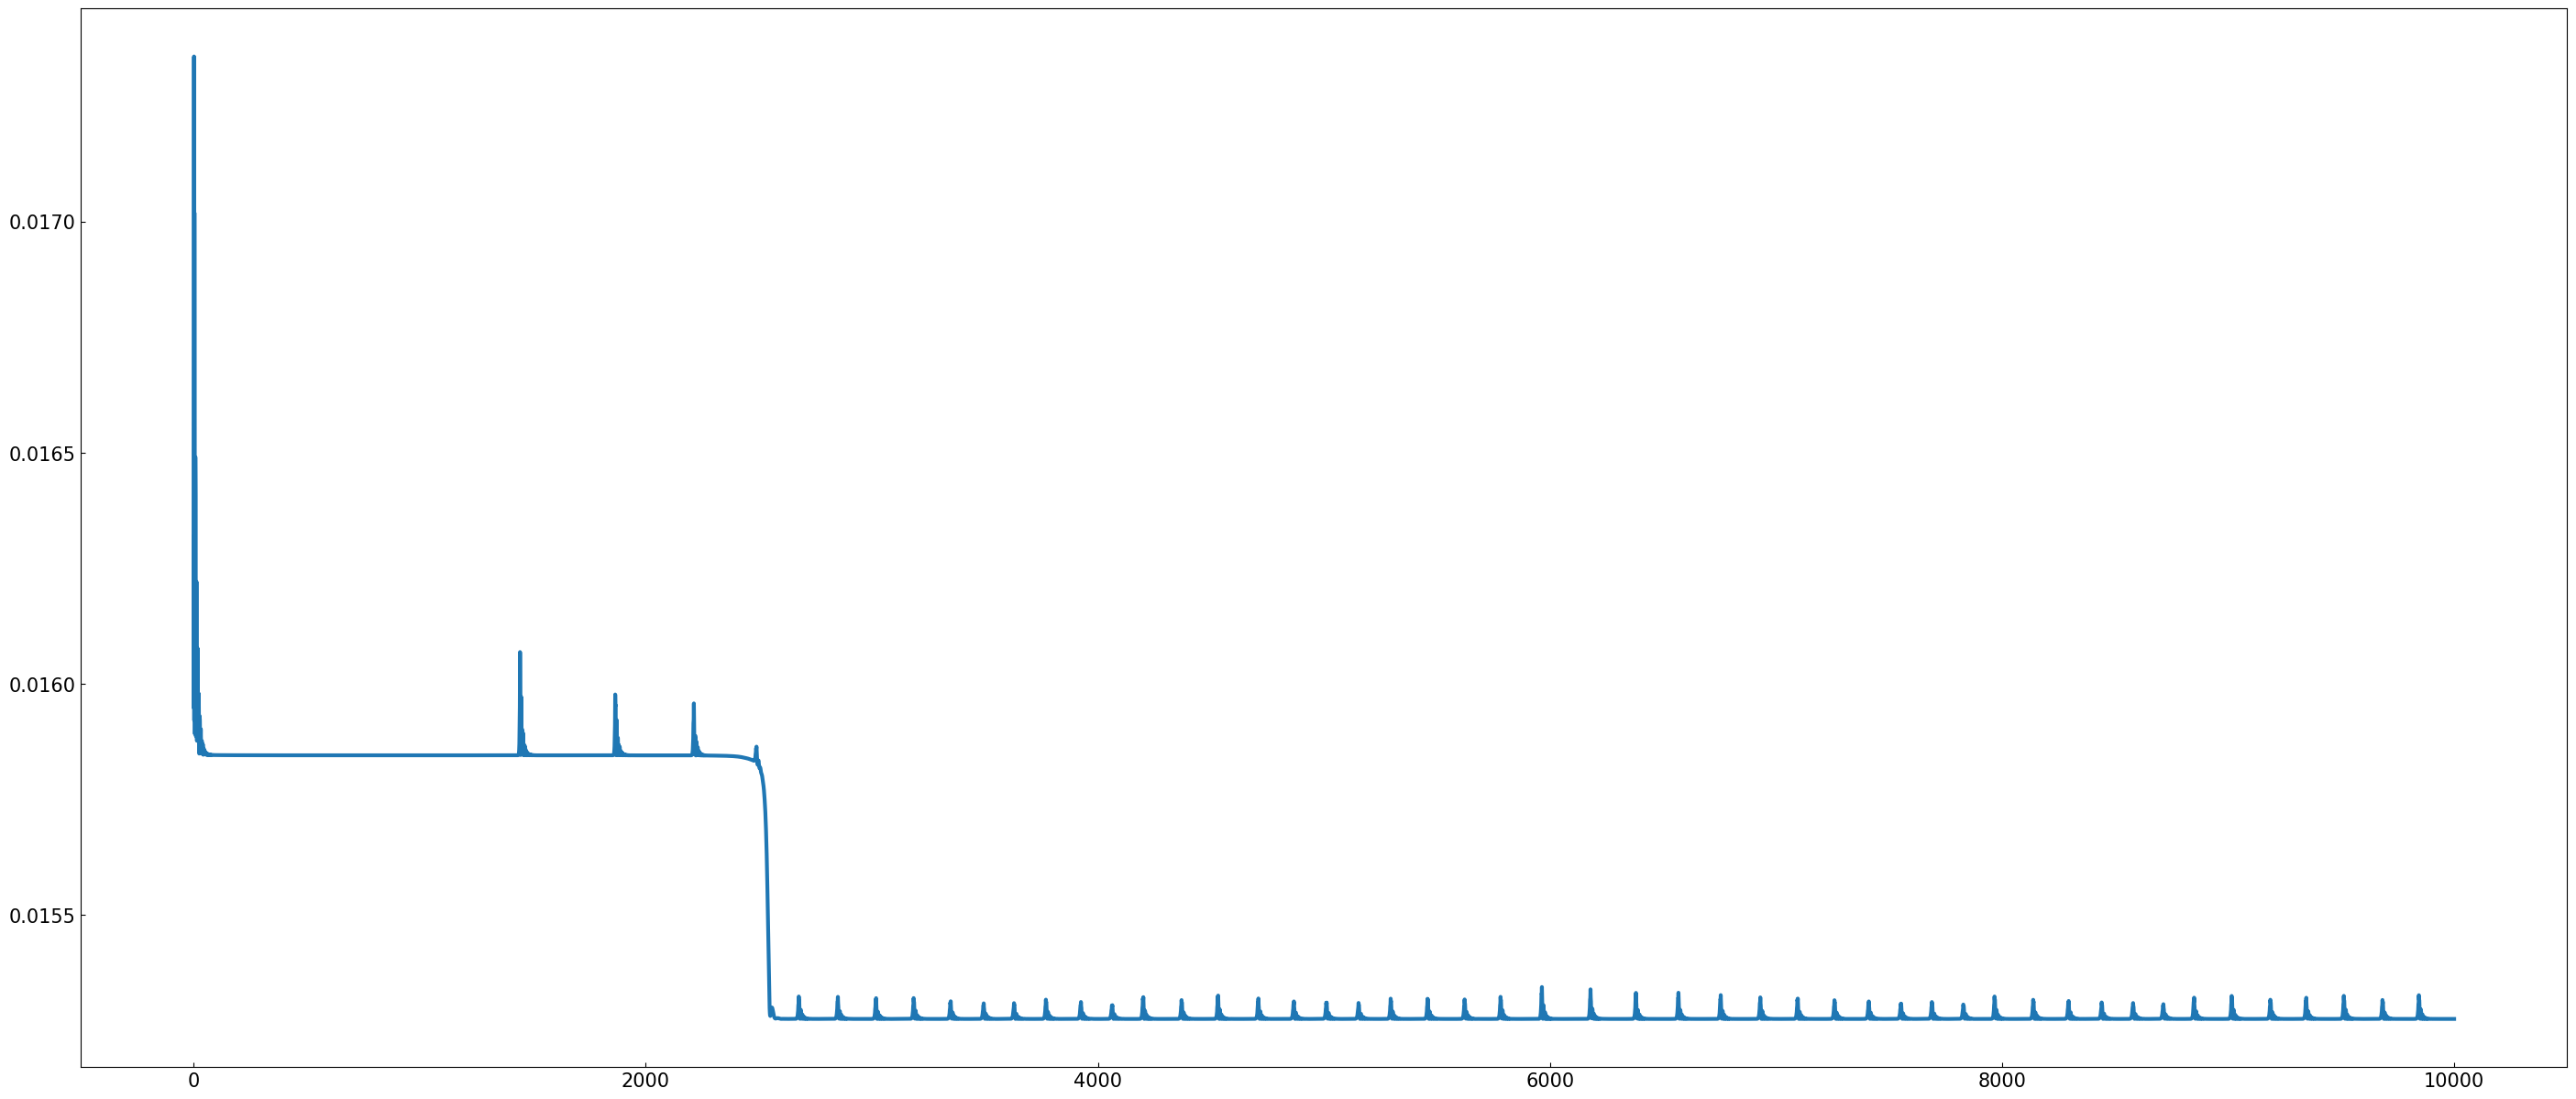

In [183]:
plt.plot(jnp.array(Hbeta_class.loss).T[3])

In [133]:
from SHEAP.fitting.functions import linear

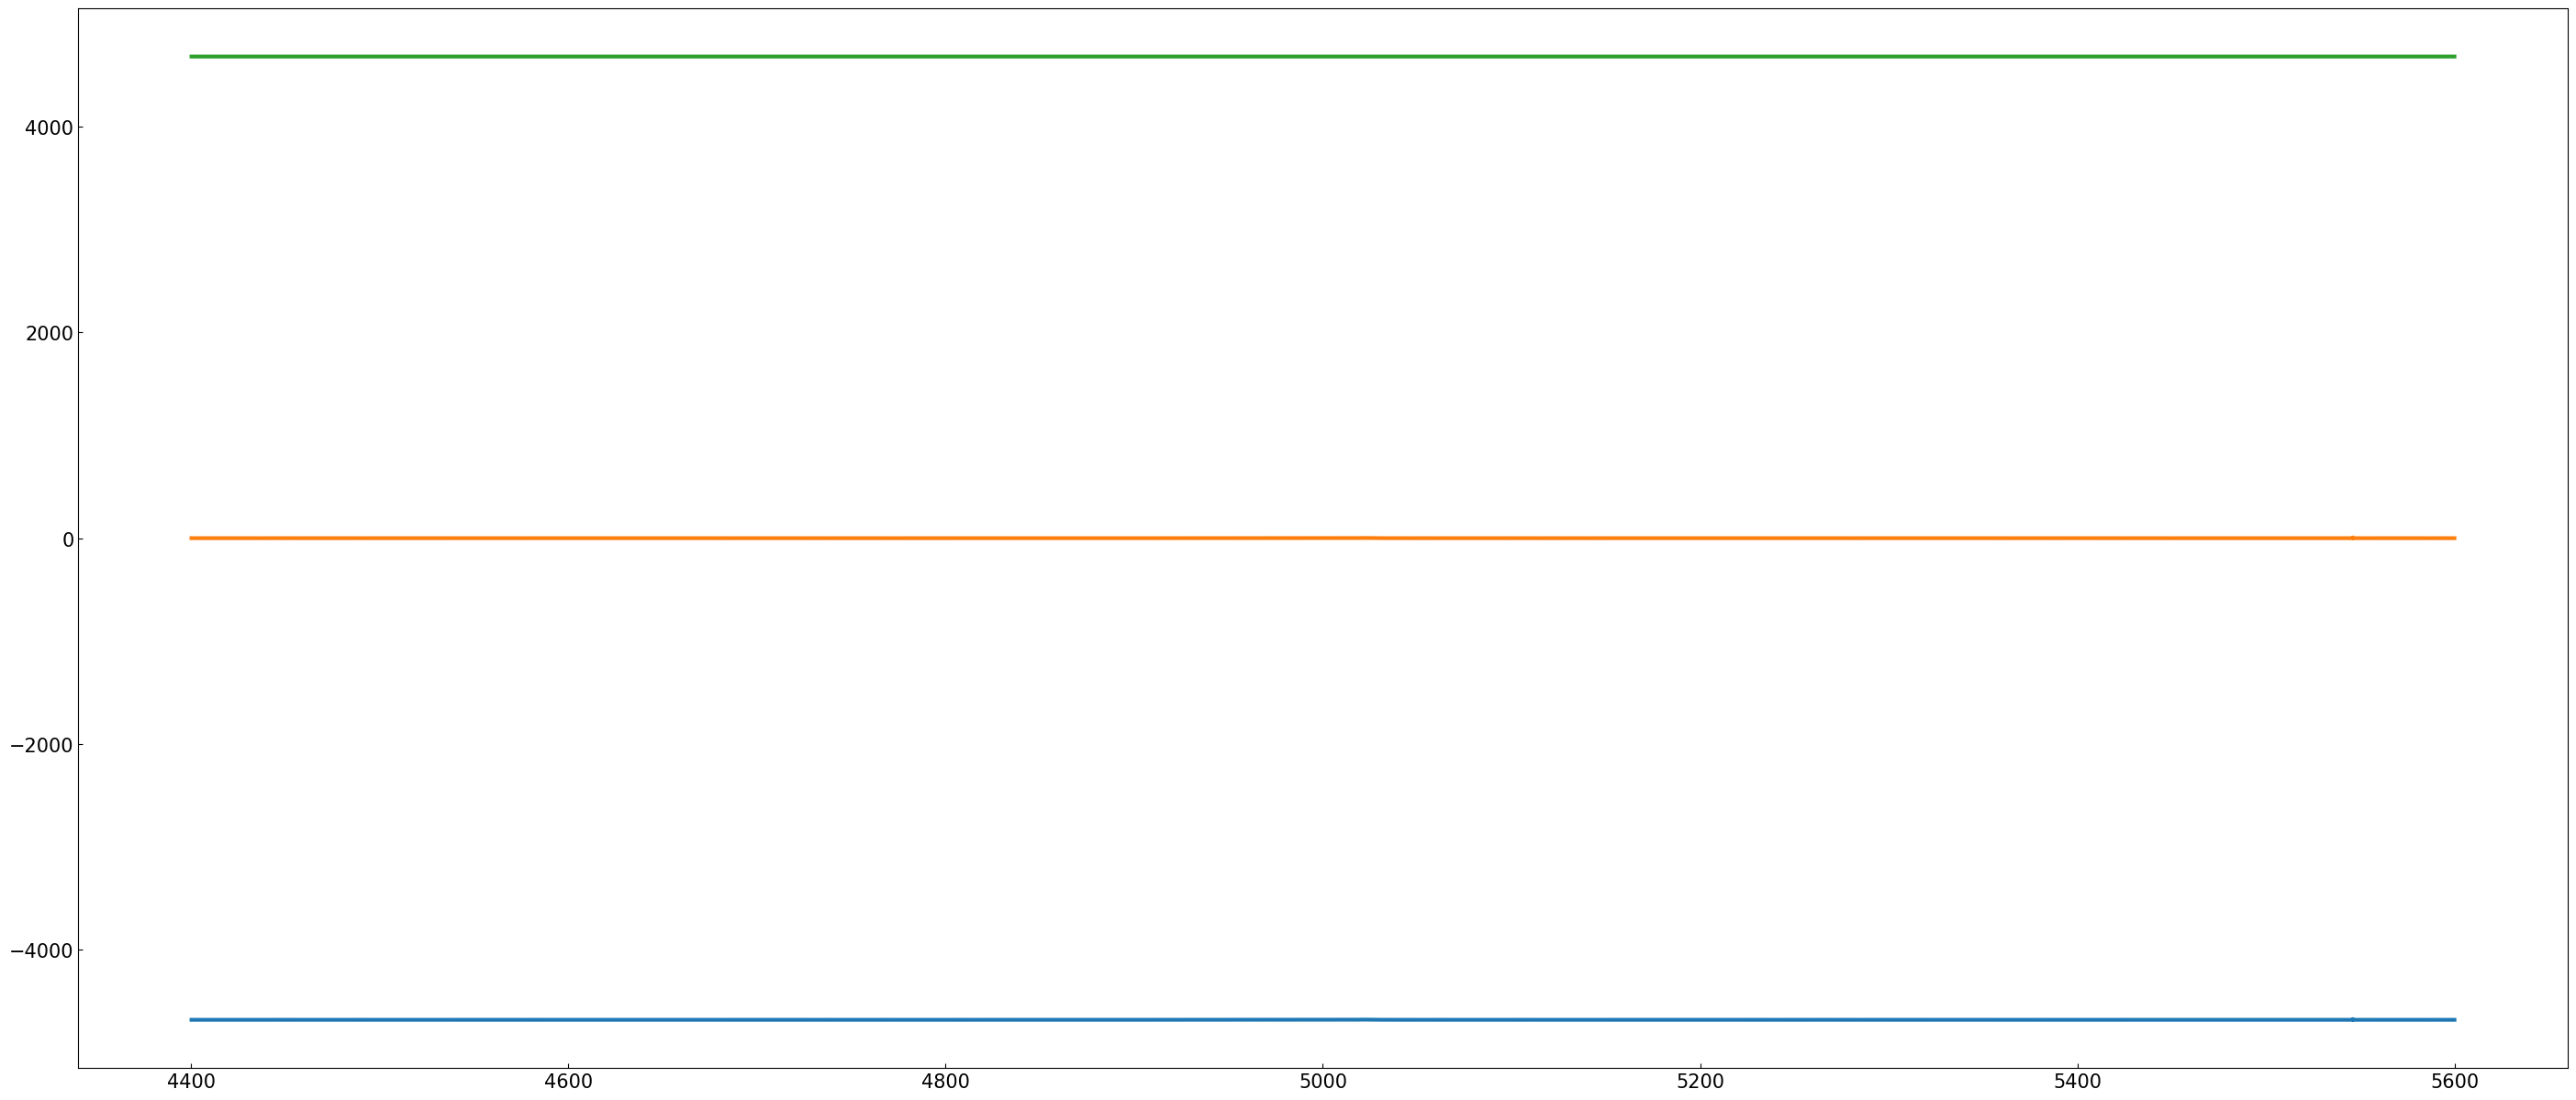

In [202]:
n = 3
plt.plot(Spectra[n,0,:],Spectra[n,1,:]-linear(Spectra[n,0,:],Hbeta_class.params[n]))
plt.plot(Spectra[n,0,:],Spectra[n,1,:])
plt.plot(Spectra[n,0,:],linear(Spectra[n,0,:],Hbeta_class.params[n]))

In [178]:
Hbeta_class.params.shape

(4, 35)

In [179]:
Hbeta_class.params[3]

Array([1.92298516e+00, 4.69987712e+03, 3.12596923e+00, 4.05196944e+00,
       4.88497768e+03, 4.19408970e+01, 4.05196944e+00, 4.88497768e+03,
       4.19408970e+01, 3.07196110e-01, 4.49156296e+03, 1.23003538e+00,
       5.66310653e-01, 4.58723745e+03, 5.12581083e+01, 5.66310653e-01,
       4.58723745e+03, 5.12581083e+01, 3.29325639e+00, 4.87741182e+03,
       3.24313229e+00, 2.41357852e+01, 5.02027891e+03, 8.58060756e+00,
       8.88162028e+00, 4.97379848e+03, 1.10073050e+01, 9.92966105e+00,
       4.97450273e+03, 3.30821936e+00, 3.30988702e+01, 5.02283312e+03,
       3.34017965e+00, 1.63717006e-01, 1.36526883e+01], dtype=float64)

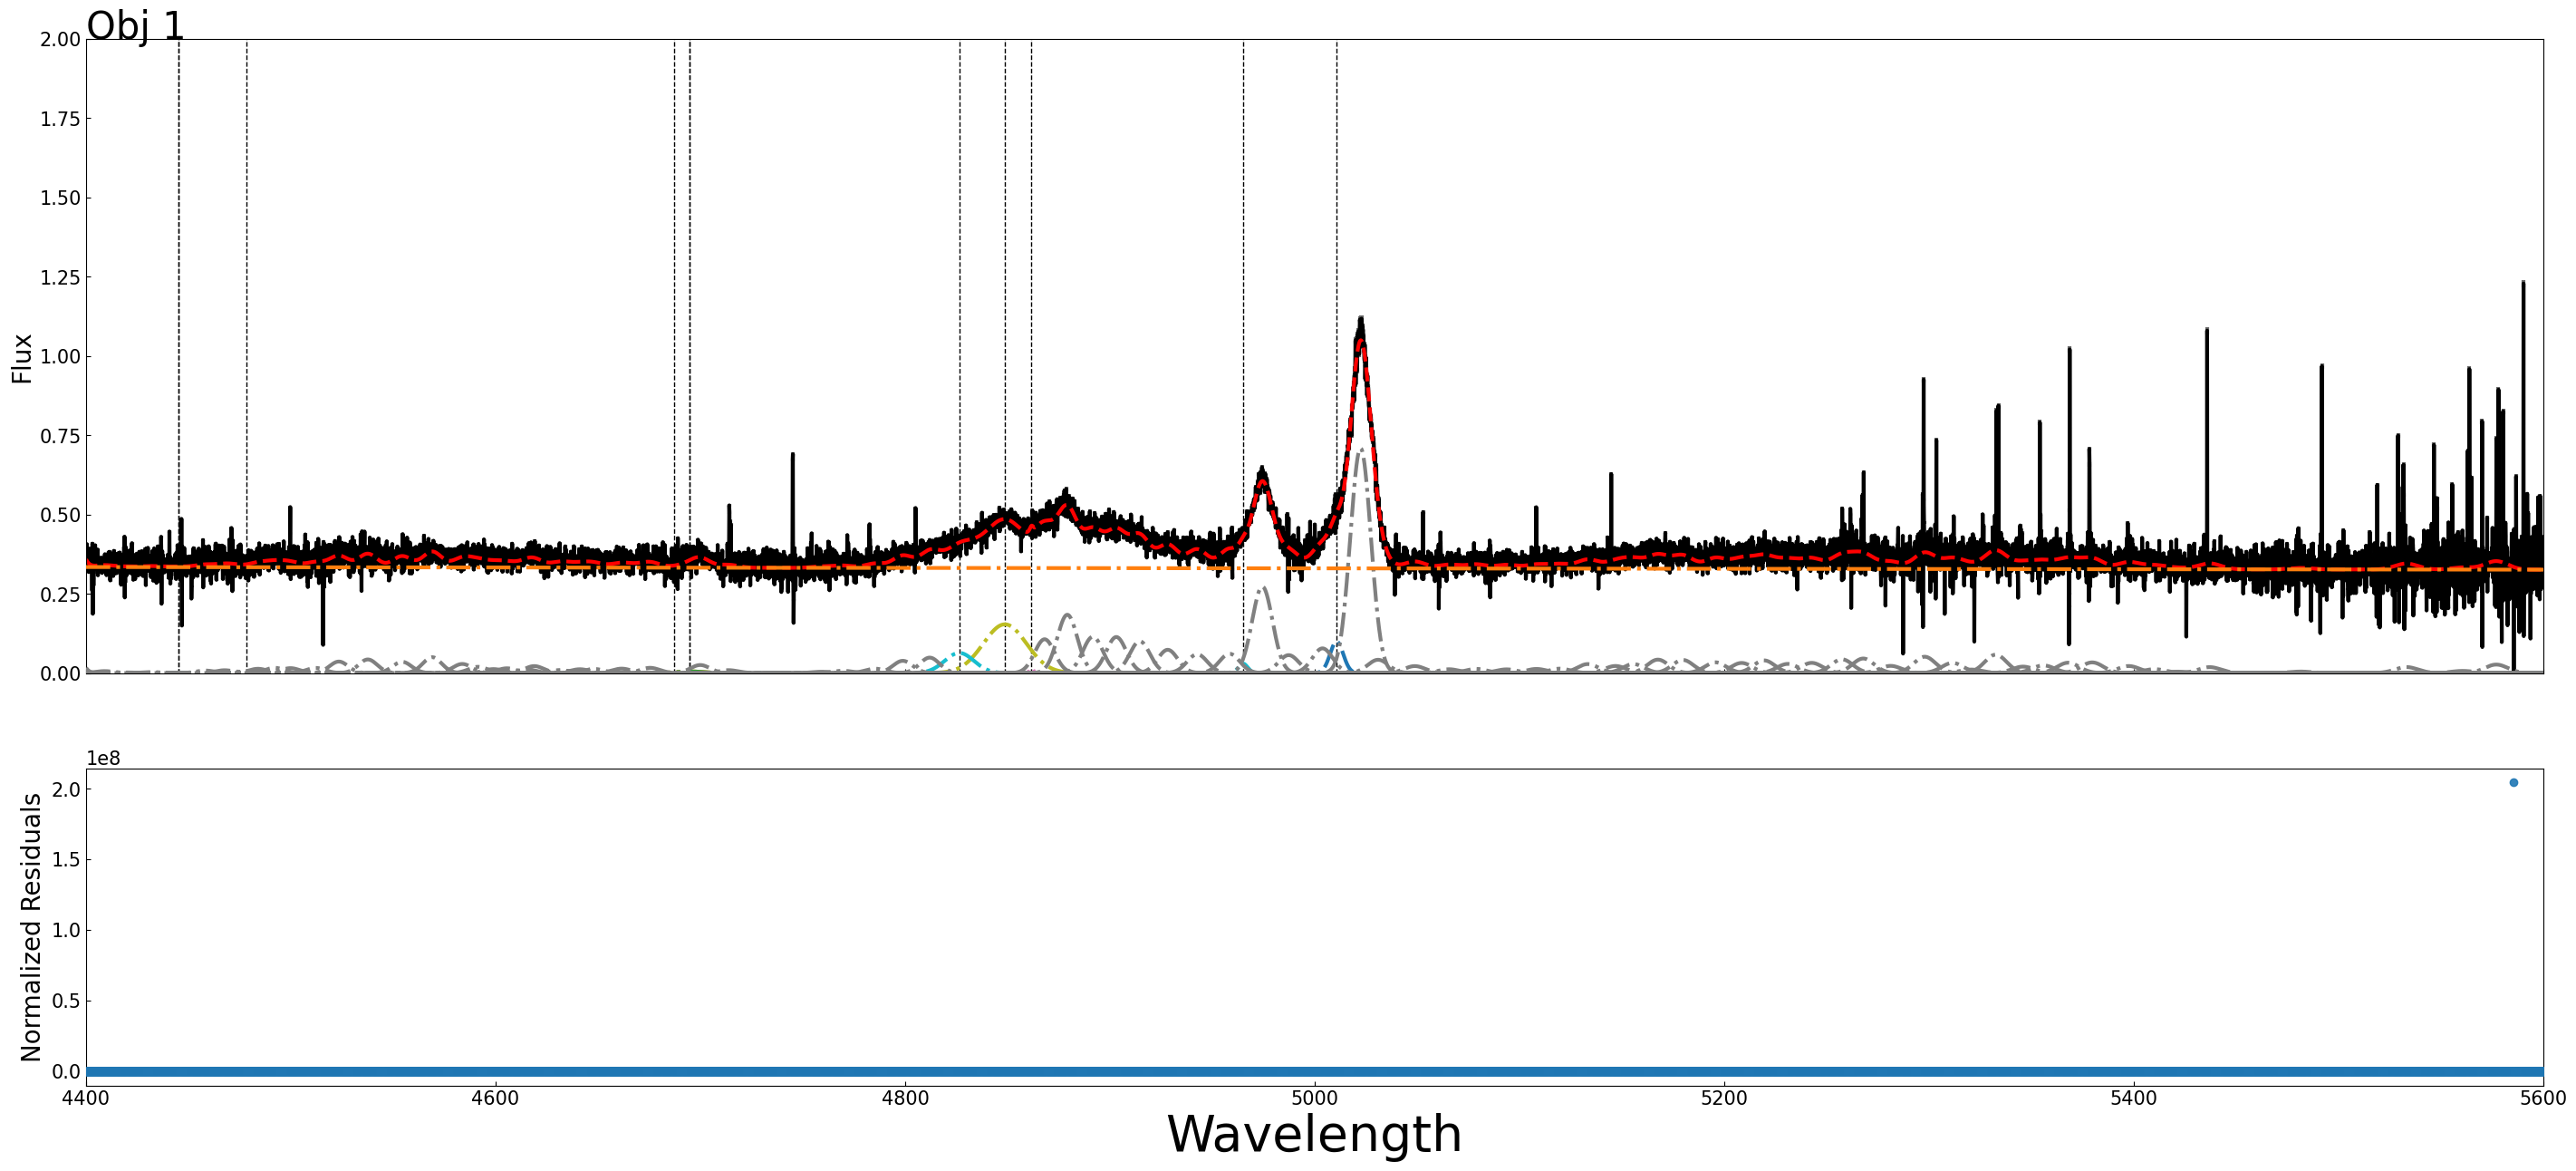